In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [12]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')
train_data=train_dataset.copy()
test_data=test_dataset.copy()
train_label=train_data.pop('label')
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def shape(data):
    data=np.array(data)
    data=data.reshape(data.shape[0],28,28,1)
    data=data.astype('float32')
    data=data/255.
    return data
train_data=shape(train_data)
test_data=shape(test_data)

In [36]:
datagen = keras.preprocessing.image.ImageDataGenerator(
          rotation_range=30,                   
          zoom_range = 0.1,                     
          width_shift_range=0.1,               
          height_shift_range=0.1,              
          shear_range=0.1,
          fill_mode='nearest')                 

datagen.fit(train_data)

In [38]:
model=keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_data,train_label,epochs=10,validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 380s 11ms/sample - loss: 0.1714 - accuracy: 0.9485 - val_loss: 0.0582 - val_accuracy: 0.9808
Epoch 2/10
33600/33600 [==============================] - 367s 11ms/sample - loss: 0.0578 - accuracy: 0.9815 - val_loss: 0.0500 - val_accuracy: 0.9829
Epoch 3/10
33600/33600 [==============================] - 365s 11ms/sample - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0414 - val_accuracy: 0.9882
Epoch 4/10
33600/33600 [==============================] - 367s 11ms/sample - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0534 - val_accuracy: 0.9846
Epoch 5/10
33600/33600 [==============================] - 366s 11ms/sample - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0510 - val_accuracy: 0.9855
Epoch 6/10
33600/33600 [==============================] - 365s 11ms/sample - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0625 - val_accuracy: 0.9864
Epoch 7/10
33600/33600 [=====================

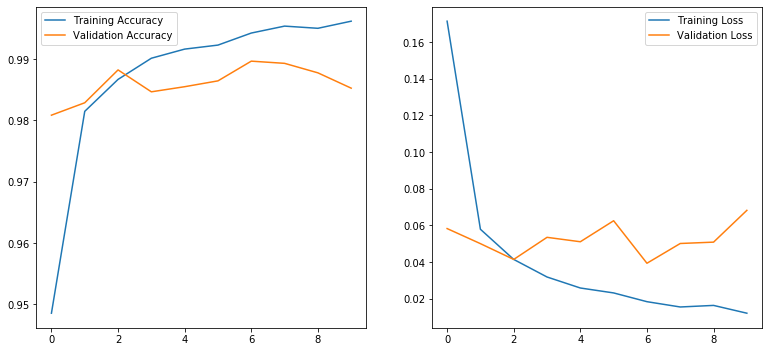

In [39]:
dic=history.history
train_acc=dic['accuracy']
val_acc=dic['val_accuracy']
train_loss=dic['loss']
val_loss=dic['val_loss']
epochs=range(len(train_acc))
plt.figure(figsize=(13,13))
plt.subplot(221)
plt.plot(epochs,train_acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()

plt.subplot(222)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.legend()
plt.show()

In [40]:
predictions=model.predict(test_data)
test_pred=[]
for i in predictions:
    test_pred.append(np.argmax(i))
test_index=np.array(range(1,len(test_pred)+1))
test_pred=np.array(test_pred)
test_pred_df=pd.DataFrame()
test_pred_df['ImageId']=test_index
test_pred_df['Label']=test_pred
test_pred_df.to_csv('my_predictions.csv',index=False)